# Lab4

### Multivariate Linear and Polynomial Regression

## 1. Get the data

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X = diabetes['data']
diabetes_y = diabetes['target']

In [3]:
import pandas as pd
df_diabetes_X = pd.DataFrame(diabetes_X, columns = diabetes['feature_names'])
df_diabetes_y = pd.DataFrame(diabetes_y)
df_diabetes_y.columns = ['target']
df_diabetes = pd.DataFrame(diabetes_X, columns = diabetes['feature_names'])
df_diabetes['target'] = df_diabetes_y

## 2. Frame the Problem

* Our goal is to build the best polynomial regression model that predicts the risk of diabetes progression based on BMI. We need to evaluate models based on R-squared, MAPE, and MAE metrices. After that, we will find the best fitted model and this model will serve as a tool for physicians to identify patients at higher risk of diabetes progrssion.

## 3. EDA - Describe the data, explore it, and provide insights about it. 

In [1]:
df_diabetes.describe()

NameError: name 'df_diabetes' is not defined

* all features have been standardized (especially sex is categorical value, but it already converted to numerical values). and also other variables already have been scaled.
* But only target variable is not scaled, which is actual observed values.
* Since features are already scaled, their ranges are a few standard deviations from the mean, maybe no extreme outliers exist in the features.

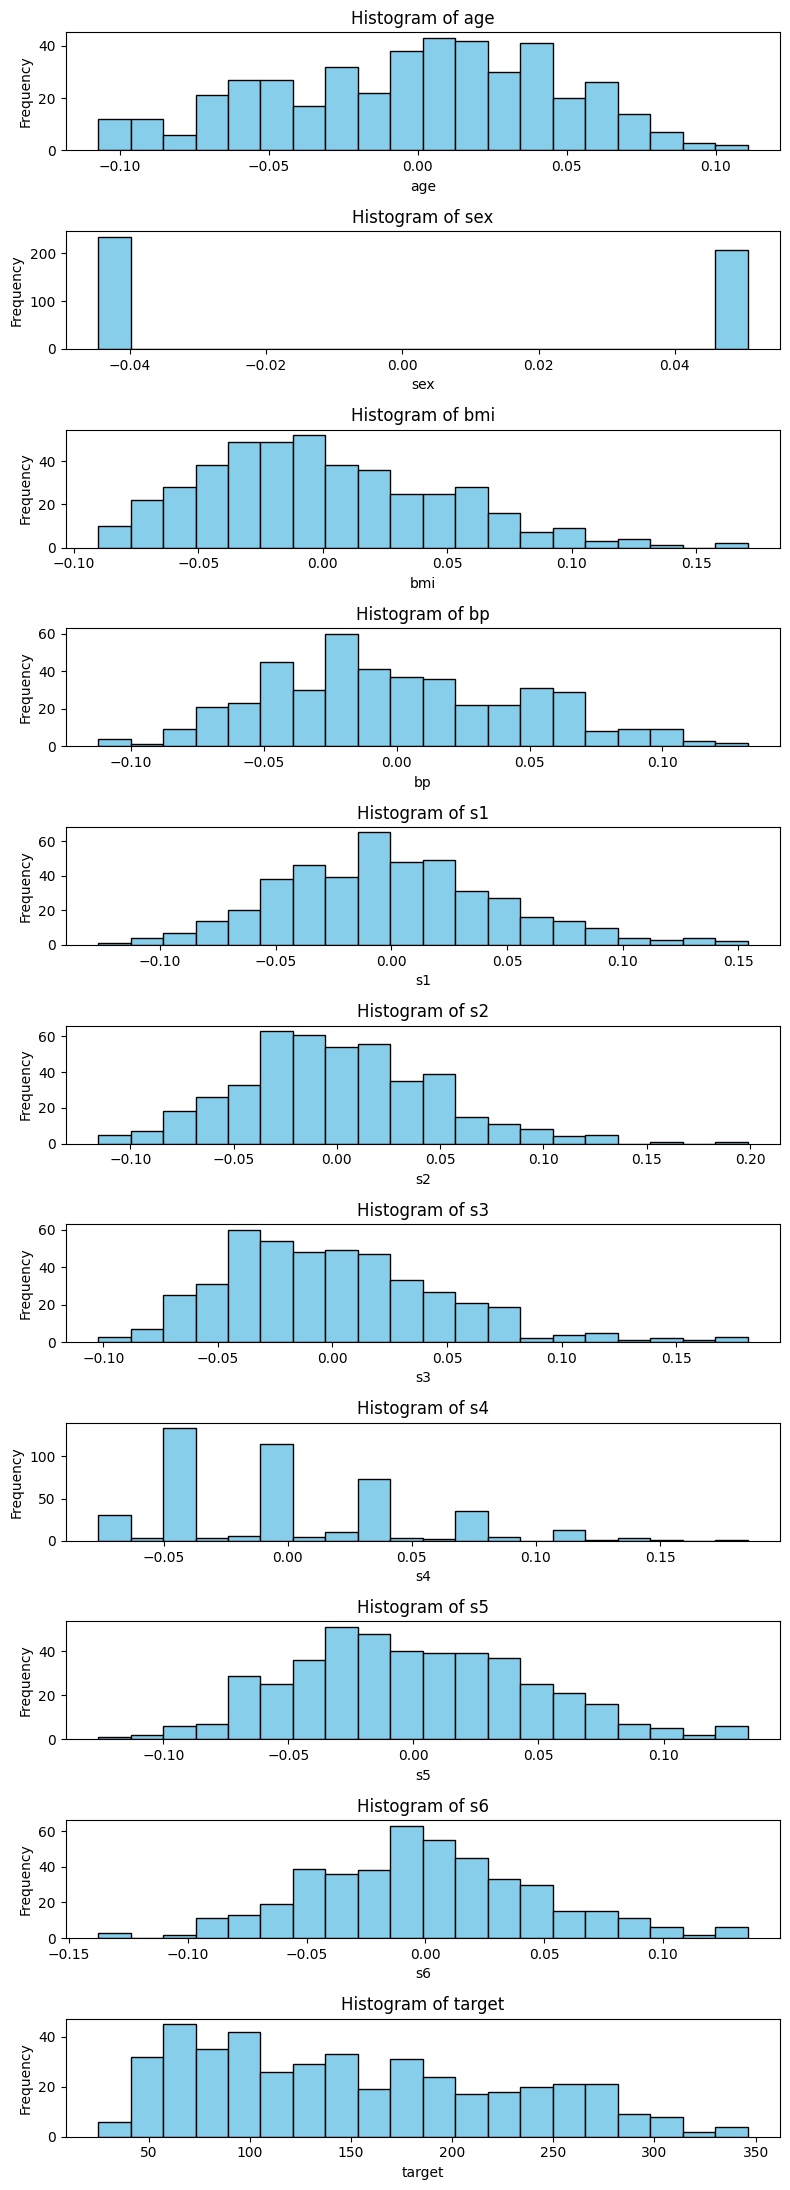

In [5]:
import matplotlib.pyplot as plt
import numpy as np

n_features = df_diabetes.shape[1]  
fig, ax = plt.subplots(n_features, 1, figsize=(8, n_features * 2)) 

for i, col in enumerate(df_diabetes.columns):
    ax[i].hist(df_diabetes[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Histogram of {col}') 
    ax[i].set_xlabel(col)  
    ax[i].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()

* sex feature is categorical(binary) as indicated by its histogram. 
* except s4, all features show normally distributed. 
* target variable shows slightly right-skewed distribution.

<Axes: >

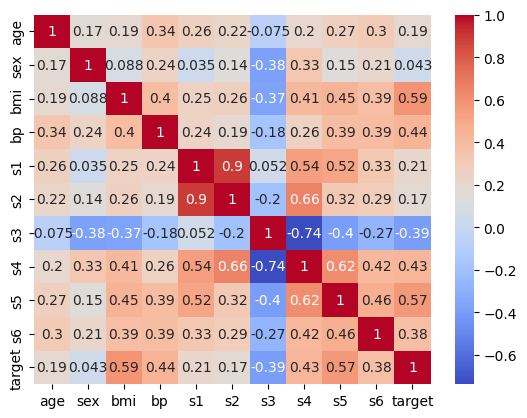

In [6]:
import seaborn as sns

corr = df_diabetes.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

* The correlation matrix shows how each variable relates to others, especially BMI has a relatively high positive correlation with the target(disease progrssion after one year), assuming that BMI can be a significant predictor for diabetes progrssion.
* Blood pressure and s4, s5 also show a moderate positive correlation with the target, which can indicate their importance in predicting diabetes progression.

## 4. Clean the data if needed, and explain the reason

In [7]:
print(df_diabetes.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


I do not need to clean the data because there is no null data and from the histogram there is no stand out outlier in the data.

## 5. Split the dataset to a train (70%), validation (15%) and test (15%) sets

In [57]:
train_size = int(len(df_diabetes) * 0.7)
train = df_diabetes[:train_size]
test = df_diabetes[train_size:]
valid_size = int(len(test)*0.5)
validation = test[:valid_size]
test = test[valid_size:]

## 6. Run a polynomial regression on the BMI feature versus the "disease progression one year after baseline" -from degree 0 to 5

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model0 = Pipeline([('polynomial', PolynomialFeatures(degree=0)), 
                  ('linear', LinearRegression())])
model0.fit(X=train[["bmi"]], y= train[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                ('linear', LinearRegression())])

In [32]:
model1 = Pipeline([('polynomial', PolynomialFeatures(degree=1)), 
                  ('linear', LinearRegression())])
model1.fit(X=train[["bmi"]], y= train[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])

In [33]:
model2 = Pipeline([('polynomial', PolynomialFeatures(degree=2)), 
                  ('linear', LinearRegression())])
model2.fit(X=train[["bmi"]], y= train[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())])

In [34]:
model3 = Pipeline([('polynomial', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression())])
model3.fit(X=train[["bmi"]], y= train[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [35]:
model4 = Pipeline([('polynomial', PolynomialFeatures(degree=4)), 
                  ('linear', LinearRegression())])
model4.fit(X=train[["bmi"]], y= train[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

In [36]:
model5 = Pipeline([('polynomial', PolynomialFeatures(degree=5)), 
                  ('linear', LinearRegression())])
model5.fit(X=train[["bmi"]], y= train[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression())])

## 7. Compare the six models using the training and validation data

### 1) Report R-squared, MAPE and MAE.

In [37]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

print("model degree 0")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model0.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model0.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model0.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model0.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model0.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model0.predict(validation[['bmi']]))}")

print("\nmodel degree 1")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model1.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model1.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model1.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model1.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model1.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model1.predict(validation[['bmi']]))}")

print("\nmodel degree 2")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model2.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model2.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model2.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model2.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model2.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model2.predict(validation[['bmi']]))}")

print("\nmodel degree 3")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model3.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model3.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model3.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model3.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model3.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model3.predict(validation[['bmi']]))}")

print("\nmodel degree 4")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model4.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model4.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model4.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model4.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model4.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model4.predict(validation[['bmi']]))}")

print("\nmodel degree 5")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model5.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model5.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model5.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model5.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model5.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model5.predict(validation[['bmi']]))}")

model degree 0
Train set
R-squared: 0.0
MAPE: 0.6285007633022878
MAE: 65.69952137074392

Validation set
R-squared: -0.06843900547489135
MAPE: 0.44266359693287144
MAE: 62.19569481219966

model degree 1
Train set
R-squared: 0.3391503044527786
MAPE: 0.48879771700533403
MAE: 52.19634802757251

Validation set
R-squared: 0.3167996588361669
MAPE: 0.34611031591084374
MAE: 48.67883561846707

model degree 2
Train set
R-squared: 0.3438067683933749
MAPE: 0.4848556049729501
MAE: 51.8014663893258

Validation set
R-squared: 0.26875193642245343
MAPE: 0.3481501081704935
MAE: 49.71301427166435

model degree 3
Train set
R-squared: 0.3441850396545786
MAPE: 0.4834098166209495
MAE: 51.71986277769281

Validation set
R-squared: 0.2807178918716272
MAPE: 0.34555765500985947
MAE: 49.31014931864143

model degree 4
Train set
R-squared: 0.34637096280637414
MAPE: 0.4815713719176145
MAE: 51.60769487682802

Validation set
R-squared: 0.24113452213981945
MAPE: 0.3490724845292864
MAE: 50.44737137834758

model degree 5
Tr

### 2) Conclusion: Choose the best model and explain your reasoning quantitively.

I will choose the model1 (degree 1). When choosing the best model among polinomial regression models of degree 0 to 5, we should consider a balance between complexity and predictive power to avoid overfitting. 

degree 0 model is inadequate since it has a negative R-square value, and also it has the highest errors (MAPE and MAE).

<b>degree 1 model (best)</b> shows a significant improvement compared to degree 0 model. It shows a relatively high R-squared value, and the errors are lower than the degree 0 model. It explains the data quite well and provides reasonable predictions. This model is simple compared to higher-degree models.

degree 2 to degree 5 models exhibits similar R-squared values and MAE/MAPE values. The errors decrease slightly within the increasing degree of the polynomial, but on validation set these models' errors increased compared to the degree 1 model. Additionally, they introduce more complexity into the model.

Considering the balance between model complexity and performance, the degree 1 model appears to be a reasonable choice. Its performance is relatively good (has a high R-squared value, and low errors). other higher degree models may risk overfitting the data and adding unnecessary complexity without significant performance gains.

1. Run the chosen model on the test set, and report R-Squared, MSE and MAE for it.

In [38]:
print("\nbest model: degree 1")
print("Test set")
print(f"R-squared: {r2_score(test[['target']], model1.predict(test[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(test[['target']], model1.predict(test[['bmi']]))}")
print(f"MAE: {mean_absolute_error(test[['target']], model1.predict(test[['bmi']]))}")


best model: degree 1
Test set
R-squared: 0.3538523087303762
MAPE: 0.5202865439563414
MAE: 51.91205842533073


2. Plot a graph of the train, validation and test datapoints, and the fit of the chosen model over each of them

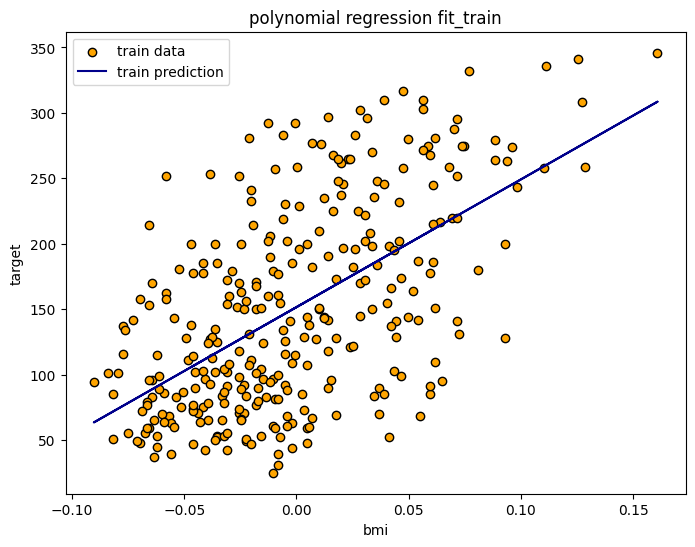

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(train[['bmi']], train[['target']], label='train data', edgecolors='black', color='orange', marker='o')
plt.plot(train[['bmi']], model1.predict(train[['bmi']]), label='train prediction', color = 'darkblue')
plt.title('polynomial regression fit_train')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

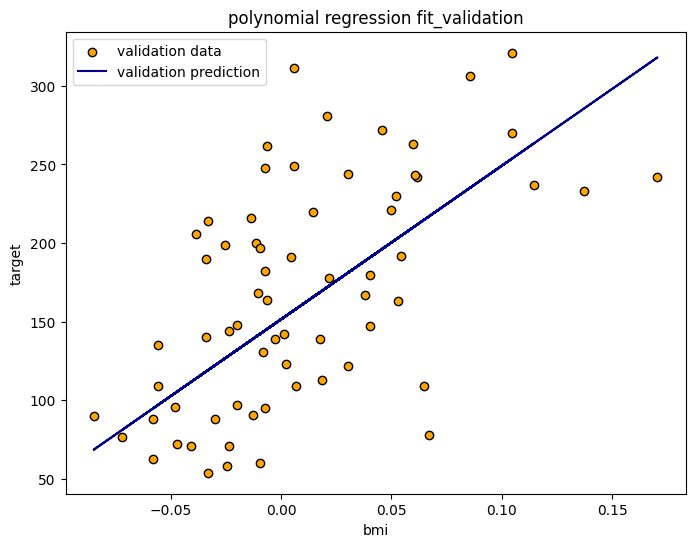

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(validation[['bmi']], validation[['target']], label='validation data', edgecolors='black', color='orange', marker='o')
plt.plot(validation[['bmi']], model1.predict(validation[['bmi']]), label='validation prediction', color = 'darkblue')
plt.title('polynomial regression fit_validation')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

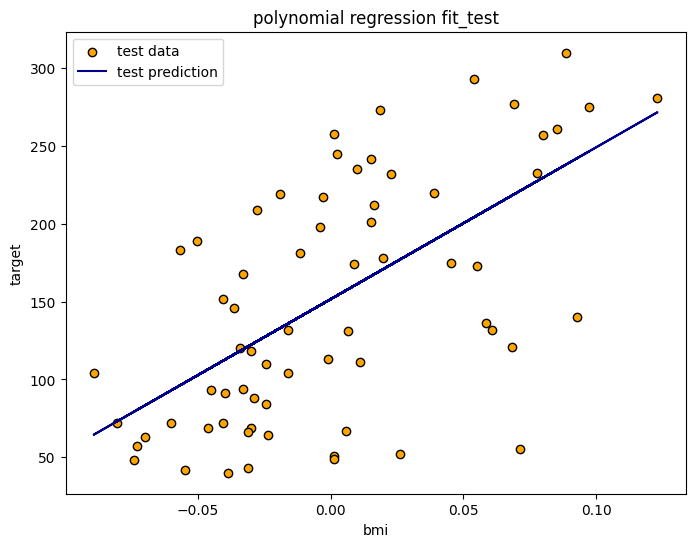

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(test[['bmi']], test[['target']], label='test data', edgecolors='black', color='orange', marker='o')
plt.plot(test[['bmi']], model1.predict(test[['bmi']]), label='test prediction', color = 'darkblue')
plt.title('polynomial regression fit_test')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

### 3) Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to model.perdict() for that value 

In [82]:
def print_pipeline_model_stats(model):
    # print model    
    print(f'Model: {model}')
    print(f'Coefficients: {model[-1].coef_[0][1:]}')
    print(f'Intercept: {model[-1].intercept_[0]}')
    # generate equation string:
    equation = f"y = {model[-1].intercept_[0]:.2f}"
    for ind, coeff in enumerate(model[-1].coef_[0][1:]):
        degree = ind + 1
        equation += f" + {coeff:.2f}x^{degree}"
    print(f'Equation: {equation}')
    print('***')

In [83]:
print_pipeline_model_stats(model1)

Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])
Coefficients: [976.10822731]
Intercept: 151.55092418989693
Equation: y = 151.55 + 976.11x^1
***


In [93]:
chosen_bmi = 0.01
y_manual = model1[-1].intercept_[0] +  model1[-1].coef_[0][1:][0] * chosen_bmi 
print(y_manual)

161.31200646296497


In [94]:
y_predicted = model1.predict([[chosen_bmi]])
print(y_predicted)

[[161.31200646]]


c:\Users\dut08\Documents\conestoga\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


They(manually calculated and predicted) are matching. 

## 3. How many trainable parameters are we fitting for each of the six models? Explain these values. One way is to use sklearn function

In [26]:
feature_names0 = model0[:-1].get_feature_names_out()
feature_names0

array(['1'], dtype=object)

* degree 0: it is a horizontal line. It only has just one parameter, which is the intercept.

In [27]:
feature_names1 = model1[:-1].get_feature_names_out()
feature_names1

array(['1', 'bmi'], dtype=object)

* degree 1: It has two parameters, one is intercept and another is coefficient of BMI. 

In [28]:
feature_names2 = model2[:-1].get_feature_names_out()
feature_names2

array(['1', 'bmi', 'bmi^2'], dtype=object)

* degree 2: It has three parameters, one is intercept and two are coefficients (one for BMI and one for BMI squared).

In [29]:
feature_names3 = model3[:-1].get_feature_names_out()
feature_names3

array(['1', 'bmi', 'bmi^2', 'bmi^3'], dtype=object)

* degree 3: It has four parameters, one is intercept and three are coefficients (one for BMI, one for BMI squared, and one for BMI cubed).

In [30]:
feature_names4 = model4[:-1].get_feature_names_out()
feature_names4

array(['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4'], dtype=object)

* degree 4: It has five parameters, one is intercept and three are coefficients (one for BMI, one for BMI squared, one for BMI cubed, and one for BMI to the power of four).

In [31]:
feature_names5 = model5[:-1].get_feature_names_out()
feature_names5

array(['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4', 'bmi^5'], dtype=object)

* degree 5: It has six parameters, one is intercept and three are coefficients (one for BMI, one for BMI squared, one for BMI cubed, one for BMI to the power of four, and one for BMI to the power of five).